# Count the usage frequency of API methods

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Download-and-unzip-source-code" data-toc-modified-id="Download-and-unzip-source-code-2">Download and unzip source code</a></span></li><li><span><a href="#Get-the-list-of-built-in-API-functions" data-toc-modified-id="Get-the-list-of-built-in-API-functions-3">Get the list of built-in API functions</a></span></li><li><span><a href="#Count-function-name-frequency-of-a-single-file" data-toc-modified-id="Count-function-name-frequency-of-a-single-file-4">Count function name frequency of a single file</a></span><ul class="toc-item"><li><span><a href="#Convert-.ipynb-to-.py" data-toc-modified-id="Convert-.ipynb-to-.py-4.1">Convert .ipynb to .py</a></span></li><li><span><a href="#Count-word-freq-in-the-python-file" data-toc-modified-id="Count-word-freq-in-the-python-file-4.2">Count word freq in the python file</a></span></li></ul></li><li><span><a href="#Count-function-name-frequency-for-files-inside-a-dir" data-toc-modified-id="Count-function-name-frequency-for-files-inside-a-dir-5">Count function name frequency for files inside a dir</a></span><ul class="toc-item"><li><span><a href="#Batch-convert-.ipynb-to-.py" data-toc-modified-id="Batch-convert-.ipynb-to-.py-5.1">Batch convert .ipynb to .py</a></span></li><li><span><a href="#Count-word-freq-of-python-files-inside-dir" data-toc-modified-id="Count-word-freq-of-python-files-inside-dir-5.2">Count word freq of python files inside dir</a></span></li><li><span><a href="#Visualization-of-func-name-freq" data-toc-modified-id="Visualization-of-func-name-freq-5.3">Visualization of func name freq</a></span><ul class="toc-item"><li><span><a href="#Display-a-vertical-bar-plot" data-toc-modified-id="Display-a-vertical-bar-plot-5.3.1">Display a vertical bar plot</a></span></li><li><span><a href="#Display-a-horizontal-bar-plot" data-toc-modified-id="Display-a-horizontal-bar-plot-5.3.2">Display a horizontal bar plot</a></span></li></ul></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li></ul></div>

## Introduction

Product owners or experienced users of an API are often concerned about the popularity or usage frequencies of the methods or properties built in the products. For instance, Esri is interested to find out what classes/methods/properties are most frequently used by the users of one of their products - <a href="https://esri.github.io/arcgis-python-api/apidoc/html/">Python API for ArcGIS</a>. 

The usage popularity report can be really useful - we can then go on to provide users with most in-demand helper snippets or function templates, find out what functionalities the general users of the API are looking for, or from a reverse-engineering perspective, get to know the user groups (e.g. GIS Professionals, data scientists, etc.).

Not all users have contributed their use cases with the <a href="https://esri.github.io/arcgis-python-api/apidoc/html/">Python API for ArcGIS</a> to WWW publicly, so it is unlikely that we can master all the usage situations of its methods or properties (a.k.a. how many times being called by user in their scripts). However, by looking at the <a href="https://github.com/Esri/arcgis-python-api"> official site</a> established by Esri that demonstrates plenty of guides or samples, we can calculate the usage frequency of API methods locally from this repo and then use the figures as sampling results to represent the overall popularity of the built-in methods.

In this sample, we will download the remote repo to the local file system, obtain a list of function names which are built-in and exposed publicly by <a href="https://esri.github.io/arcgis-python-api/apidoc/html/">Python API for ArcGIS</a>, convert the IPython Notebooks to Python Source files, count the frequency of function names, and finally create a deliverable visualization of the frequency report. Please stay with us to walk through the entire workflow!

## Download and unzip source code

First, create a new folder inside your current directory if not already exists. The downloading and unzipping operations of the zipped file will happen inside this folder.

In [1]:
import os
dir = "./ipynb_workspace"
if not os.path.exists(dir):
    os.makedirs(dir)

Then use the command line tool `curl` to download the zipped file which contains the guide and sample IPython Notebooks from Esri's <a href="https://github.com/Esri/arcgis-python-api"> official site</a>

In [2]:
!curl -L -o ./ipynb_workspace/master.zip https://github.com/Esri/arcgis-python-api/archive/master.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   127    0   127    0     0    429      0 --:--:-- --:--:-- --:--:--   451

100  5667    0  5667    0     0   9067      0 --:--:-- --:--:-- --:--:--  9067
100 6663k    0 6663k    0     0  4100k      0 --:--:--  0:00:01 --:--:-- 6657k
100 20.1M    0 20.1M    0     0  7782k      0 --:--:--  0:00:02 --:--:--  9.9M
100 28.3M    0 28.3M    0     0  8020k      0 --:--:--  0:00:03 --:--:-- 9689k
100 37.0M    0 37.0M    0     0  8201k      0 --:--:--  0:00:04 --:--:-- 9482k
100 46.2M    0 46.2M    0     0  8412k      0 --:--:--  0:00:05 --:--:-- 9463k
100 55.9M    0 55.9M    0     0  8651k      0 --:--:--  0:00:06 --:--:--  9.8M
100 66.3M    0 66.3M    0     0  8915k      0 --:--:--  0:00:07 --:--:-- 9521k
100 77.4M    0 77.4M    0     0  9198k      0 --:-

Once downloading is finished, use a third party module calle `zipfile` to unzip it to a new folder "unzipped_master".

In [3]:
ziped_file = os.path.realpath('./ipynb_workspace/master.zip')

In [4]:
unzipped_folder = os.path.realpath('./ipynb_workspace/unzipped_master')

In [5]:
import zipfile
with zipfile.ZipFile(ziped_file, 'r') as zip_ref:
    zip_ref.extractall(unzipped_folder)

To save the disk space, remove the zipped file once the previous cell is done extracting.

In [6]:
os.remove(ziped_file)

## Get the list of built-in API functions

Because some of the functions are later defined in the IPython Notebooks or Python Source files which are contributed by users, we need to create a list of function names that exclude these customized ones and only keep those built-in API functions.

Here, we will take advantage of the <a href="https://esri.github.io/arcgis-python-api/apidoc/html/genindex.html">api ref doc</a> which in theory has listed the function names of all built-ins.

In [7]:
from lxml import html
import requests

page = requests.get('https://esri.github.io/arcgis-python-api/apidoc/html/genindex.html')
tree = html.fromstring(page.content)

#Below will create a list of function names:
references = tree.xpath('//table[@class="indextable genindextable"]//a/text()')

In [8]:
""" [1] are sometimes carried into the xpath tree, use the for loop to remove all its occurrences
"""
try:
    while(True):
        l = references.remove('[1]')
except ValueError as ve:
    print("list.remove(x): x not in list")

list.remove(x): x not in list


Now we have a list of all built-in modules/functions, a total of 2190.

In [9]:
len(references)

2190

The list contains 2190 function names, and we can have a sip of what the list looks like by querying by index.

In [10]:
references[5:10]

['acos() (in module arcgis.raster.functions)',
 'acosh() (in module arcgis.raster.functions)',
 'activate() (arcgis.gis.admin.Webhook method)',
 'active_gis (in module arcgis.env)',
 'add() (arcgis.apps.hub.IndicatorManager method)']

Also, we can filter the list to get a module-specific list. For instance, as executed in the cells below, the `raster_ref_list` points to a list containing all functions inside `arcgis.raster`, `feat_ref_list` points to a list containing all functions inside `arcgis.feature`, while `gis_ref_list` is of those functions inside `arcgis.gis`.

In [11]:
raster_ref_list = [k for k in references if 'arcgis.raster' in k]
raster_ref_list[10:15]

['arcgis.raster.functions.gbl (module)',
 'arcgis.raster.functions.RFT (built-in class)',
 'arcgis.raster.orthomapping (module)',
 'arg_max() (in module arcgis.raster.functions)',
 'arg_median() (in module arcgis.raster.functions)']

In [12]:
feat_ref_list = [k for k in references if 'arcgis.features' in k]
feat_ref_list[:5]

['abs() (arcgis.features.SpatialDataFrame method)',
 '(arcgis.features.SpatialDataFrame method)',
 '(arcgis.features.managers.AttachmentManager method)',
 'add_prefix() (arcgis.features.SpatialDataFrame method)',
 'add_suffix() (arcgis.features.SpatialDataFrame method)']

In [26]:
gis_ref_list = [k for k in references if 'arcgis.gis' in k]
gis_ref_list[15:20]

['add_database() (arcgis.gis.DatastoreManager method)',
 '(arcgis.gis.server.DataStoreManager method)',
 'add_folder() (arcgis.gis.DatastoreManager method)',
 '(arcgis.gis.server.DataStoreManager method)',
 'add_group_to_workspace() (arcgis.gis.admin.Collaboration method)']

A helper function is defined below, to check if a function name found in the use cases belongs inside the built-in list that we just sorted out above.

In [14]:
def is_method_in_list(method_name, a_list):
    for a_line in a_list:
        if a_line.startswith(method_name+"()"):
            return True
        if "."+method_name+" method" in a_line:
            return True
    return False

The goal of this sample is to calculate the function usage frequency of all IPython Notebooks inside the target repo, and we are going to first accomplish the frequency counting part with a single file, then expand to all files inside a directory.

## Count function name frequency of a single file

### Convert .ipynb to .py

Since the IPython Notebooks usually contain Javscript syntax, and there are some situations when a javascript function name is the same as the built-in API function name, in order to avoid such conflicts from happening, we will first convert the .ipynb files to .py files, which will then remove the javascript perspectives.

In [16]:
%cd ipynb_workspace/unzipped_master/arcgis-python-api-master/samples

'Root\\ipynb_workspace\\unzipped_master\\arcgis-python-api-master\\samples'

In [17]:
import nbconvert

!jupyter nbconvert --to python your_first_notebook.ipynb

[NbConvertApp] Converting notebook your_first_notebook.ipynb to python
[NbConvertApp] Writing 6798 bytes to your_first_notebook.py


### Count word freq in the python file

The `split_word` function defined below is to split a word (a substring divided by space or line breakers) and returns function names that have been called inside this word. For example, for a word `method_a(... method_b(....))`, it should return a list of `[method_a, method_b]`.

Next, the `count_words` function reads in a script or a source file line by line, breaks each line into words, call the `split_word` to retrieve the list of used function names, then feed the result into a new list which at the end will be used to create a Counter object.

In [18]:
from collections import Counter
from re import split

BANNER = "-" * 35

def split_word(x):
    result = []
    
    if "(" not in x:
        return result
    
    x_list = x.split("(",1)
    if x_list[0] == '':
        return result
    
    z0 = x_list[0].rpartition(')')[2]
    z0 = z0.rpartition('.')[2]
    result.append(z0)
    
    if len(x_list)>1 and "(" in x_list[1]:
        z1 = split_word(x_list[1])
        for z in z1:
            result.append(z)
    return result

def count_words(filename):
    collect = []
    with open(filename, "r", encoding="utf8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            import re
            x_list = [x for x in split(" ", line) if re.match('^[a-z,A-Z]', x)]
            for x in x_list:
                z = split_word(x)
                for z_entry in z:
                    if z_entry == "" or z_entry == '' or z_entry == '-':
                        pass
                    elif "\n" in z_entry or "<" in z_entry or ">" in z_entry:
                        pass
                    elif "\\" in z_entry or "/" in z_entry or "#" in z_entry:
                        pass
                    elif "+" in z_entry or "=" in z_entry or "$" in z_entry:
                        pass
                    elif "]" in z_entry or "[" in z_entry or "'" in z_entry:
                        pass
                    elif "(" in z_entry or ")" in z_entry or "}" in z_entry or "{" in z_entry:
                        pass
                    else:
                        collect.append(z_entry)
    
    print(Counter(collect).most_common(10))
    return Counter(collect)

Calling `count_words` would print the top 10 popular function names of the input file, and return a Counter object that contains all used function names (which might exceed 10).

In [19]:
count_words('your_first_notebook.py')

[('display', 2), ('GIS', 1), ('search', 1), ('map', 1), ('add_layer', 1)]


Counter({'GIS': 1, 'search': 1, 'display': 2, 'map': 1, 'add_layer': 1})

## Count function name frequency for files inside a dir

Now we have successfully counted called function frequency in a single file, we will be more confident to expand the operation to all files inside a directory. Let's change directory to the root folder of <a href="https://github.com/Esri/arcgis-python-api"> repo</a>, and use it as destination paths.

### Batch convert .ipynb to .py

Same here, to avoid conflicts with javascript function names, we will convert the .ipynb to .py, but in order to proceed all files and subfolders inside the directory, let's do it in a batch manner via command line `for /r %f in (*.ipynb)`.

In [25]:
%cd ..

'Root\\ipynb_workspace\\unzipped_master\\arcgis-python-api-master'

In [20]:
%%cmd 
for /r %f in (*.ipynb) do jupyter nbconvert --to python %f

'Microsoft Windows [Version 10.0.16299.1387] (c) 2017 Microsoft Corporation. All rights reserved.'

### Count word freq of python files inside dir

Now that the .ipynb files inside the target folder are converted to .py file, we can go on to count the function name frequency of these python file.

Similar to `count_words` defined previously, `count_words_in_files` has added a for loop to exert the same logic to all files inside the target folder. It also return a Counter object of all built-in functions being called in these files, and print the top 20 of them to the cell output.

In [27]:
import glob, os
from pathlib import Path

def count_words_in_files(mydir, select_ref=references):
    collect_arcgis_api = []
    collect_others = []
    
    for filename in Path(mydir).glob('**/*.py'):
        
        with open(filename, "r", encoding="utf8") as f:
            for line in f:
                line = line.strip()
                if not line:
                    continue
                import re
                x_list = [x for x in split(" ", line) if re.match('^[a-z,A-Z]', x)]
                for x in x_list:
                    z = split_word(x)
                    for z_entry in z:
                        if z_entry == "" or z_entry == '' or z_entry == '-':
                            pass
                        elif "\n" in z_entry or "<" in z_entry or ">" in z_entry:
                            pass
                        elif "\\" in z_entry or "/" in z_entry or "#" in z_entry:
                            pass
                        elif "+" in z_entry or "=" in z_entry or "$" in z_entry:
                            pass
                        elif "]" in z_entry or "[" in z_entry or "'" in z_entry:
                            pass
                        elif "(" in z_entry or ")" in z_entry or "}" in z_entry or "{" in z_entry:
                            pass
                        else:
                            if is_method_in_list(z_entry, select_ref):
                                collect_arcgis_api.append(z_entry)
                            else:
                                collect_others.append(z_entry)
                        
                        # use lines below to debug if there are any customized functions being mixed up
                        if "def "+z_entry+"(" in x:
                            print(z_entry)

    print(Counter(collect_arcgis_api).most_common(20))
    return Counter(collect_arcgis_api)

Current directory is at `ROOT\ipynb_workspace\unzipped_master\arcgis-python-api-master`, so we can just input the current directory for the first argument.

Then, for the second input parameter, we will use the module specific list created previously. Just a rewind, `raster_ref_list` points to a list containing all functions inside `arcgis.raster`, `feat_ref_list` points to a list containing all functions inside `arcgis.feature`, while `gis_ref_list` is of those functions inside `arcgis.gis`.

As seen below, `result1`, `result2`, `result3` are returned Counter objects of the built-in functions for different modules, and the top 20 used of these function names are printed out here.

Here, `result` is a returned Counter object that lists the frequency of usage of all built-in functions regardless of module names.

In [28]:
result1 = count_words_in_files("./", raster_ref_list)

[('filter_by', 21), ('ndvi', 20), ('stretch', 16), ('colormap', 13), ('extract_band', 12), ('remap', 10), ('get_samples', 8), ('export_image', 7), ('list_datastore_content', 6), ('band_arithmetic', 5), ('composite_band', 4), ('filtered_rasters', 4), ('draw_graph', 3), ('blend', 3), ('ImageryLayer', 3), ('compute_histograms', 3), ('sqrt', 3), ('legend', 2), ('key_properties', 1), ('savi', 1)]


In [29]:
result2 = count_words_in_files("./", feat_ref_list)

[('head', 104), ('query', 81), ('append', 71), ('join', 46), ('plot', 41), ('apply', 24), ('items', 22), ('keys', 22), ('FeatureLayer', 20), ('create', 16), ('from_layer', 15), ('sort_values', 14), ('groupby', 14), ('astype', 13), ('round', 12), ('add_to_definition', 12), ('FeatureSet', 11), ('from_dict', 11), ('merge', 10), ('sum', 10)]


In [30]:
result3 = count_words_in_files("./", gis_ref_list)

[('GIS', 187), ('publish', 22), ('share', 19), ('import_data', 13), ('reassign_to', 13), ('create_folder', 11), ('exists', 11), ('download_thumbnail', 8), ('content', 7), ('move', 6), ('add_users', 6), ('related_items', 6), ('remove_users', 5), ('get_members', 5), ('add_bigdata', 5), ('create_from_dict', 5), ('update_role', 4), ('download_metadata', 4), ('set_background', 3), ('add_relationship', 3)]


In [42]:
result = count_words_in_files("./", references)

[('map', 238), ('add_layer', 203), ('GIS', 187), ('search', 181), ('head', 104), ('draw', 91), ('get', 83), ('query', 81), ('geocode', 80), ('append', 71), ('join', 46), ('add', 43), ('plot', 41), ('list', 37), ('apply', 24), ('update', 23), ('delete', 23), ('publish', 22), ('items', 22), ('keys', 22)]


Once we have obtained the Counter object, we can then go on to delete the unzipped folder from the local file system. Note that, the current directory is two levels down the workspace folder, we need to move up to the workspace level before deleting the unzipped folder.

In [30]:
%cd ../../

'ROOT\\ipynb_workspace'

In [35]:
import shutil

def remove(path):
    """ param <path> could either be relative or absolute. """
    if os.path.isfile(path):
        os.remove(path)  # remove the file
    elif os.path.isdir(path):
        shutil.rmtree(path)  # remove dir and all contains
    else:
        raise ValueError("file {} is not a file or dir.".format(path))

In [36]:
remove(unzipped_folder)

### Visualization of func name freq

With the Counter object, we can easily use `matplotlib.pyplot` to draw the function_name/frequency bar plots. First, let's explore how the results are rendered via a vertical bar plot.

#### Display a vertical bar plot

In [31]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_vertical_bar(counter):
    labels, values = zip(*counter.items())

    indexes = np.arange(len(labels))
    width = 1.5

    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.25, labels, rotation=90)
    plt.show()

In [32]:
plt.rcParams["figure.figsize"] = (25.6,14.4)

For the function frequency of the `arcgis.raster` module:

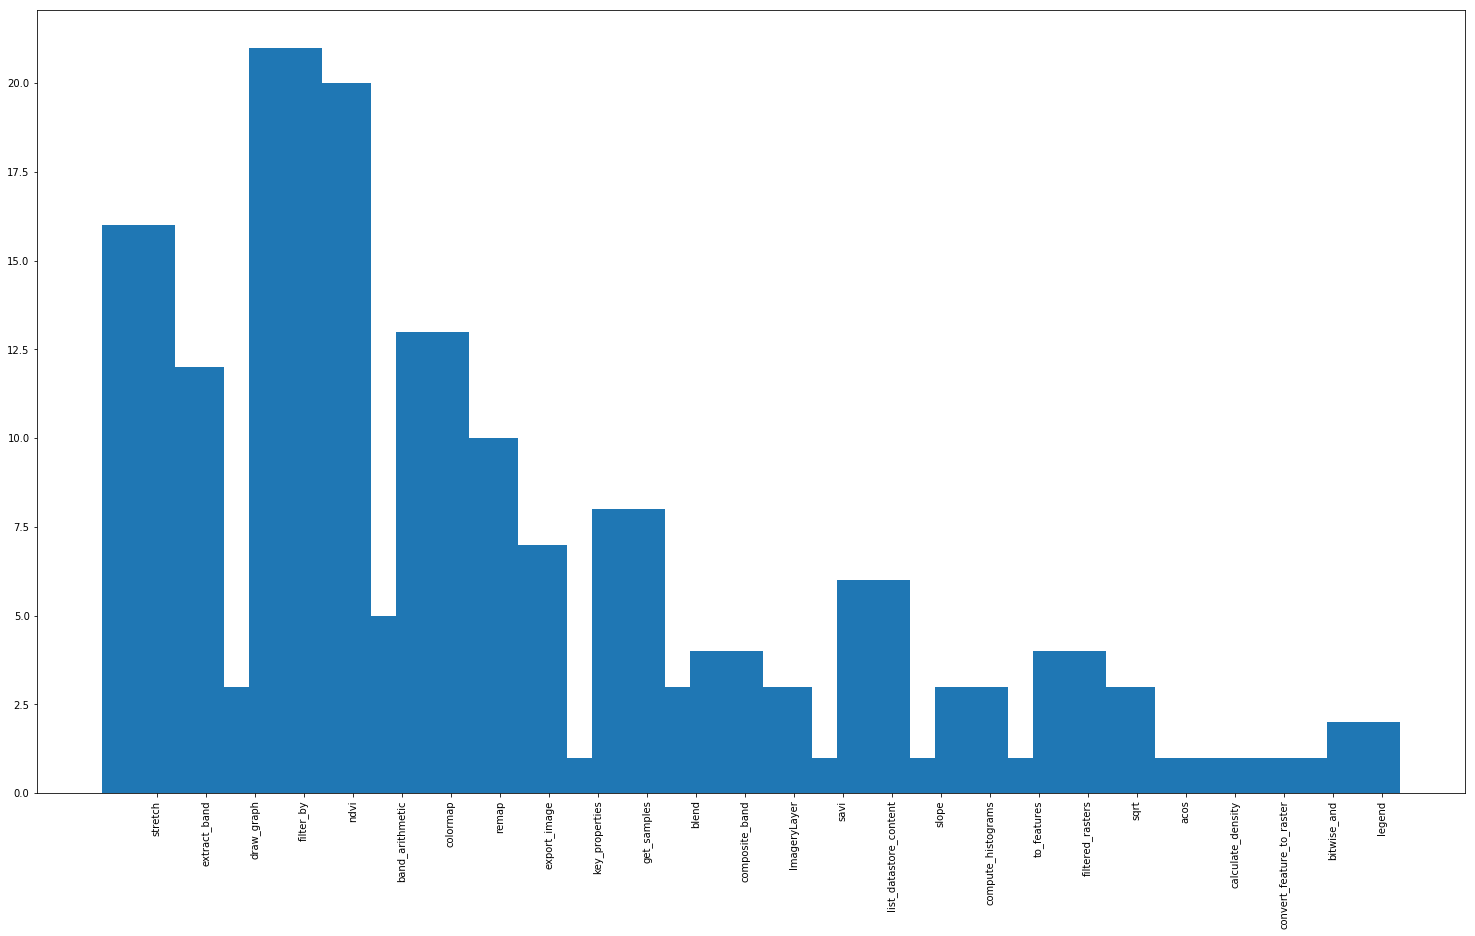

In [33]:
draw_vertical_bar(result1)

For the function frequency of the `arcgis.features` module:

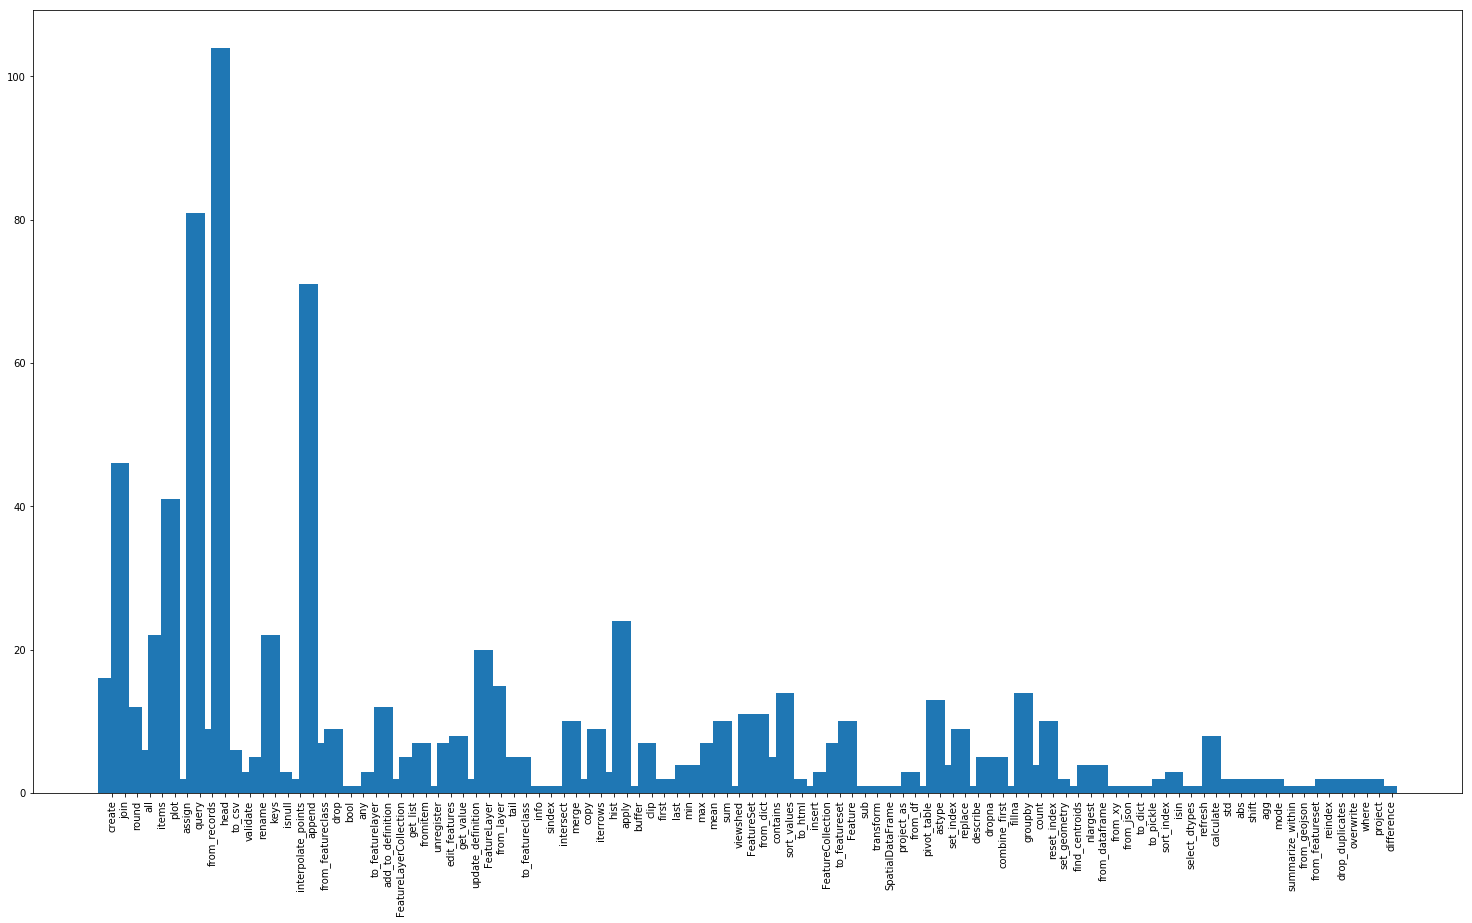

In [34]:
draw_vertical_bar(result2)

For the function frequency of the `arcgis.gis` module:

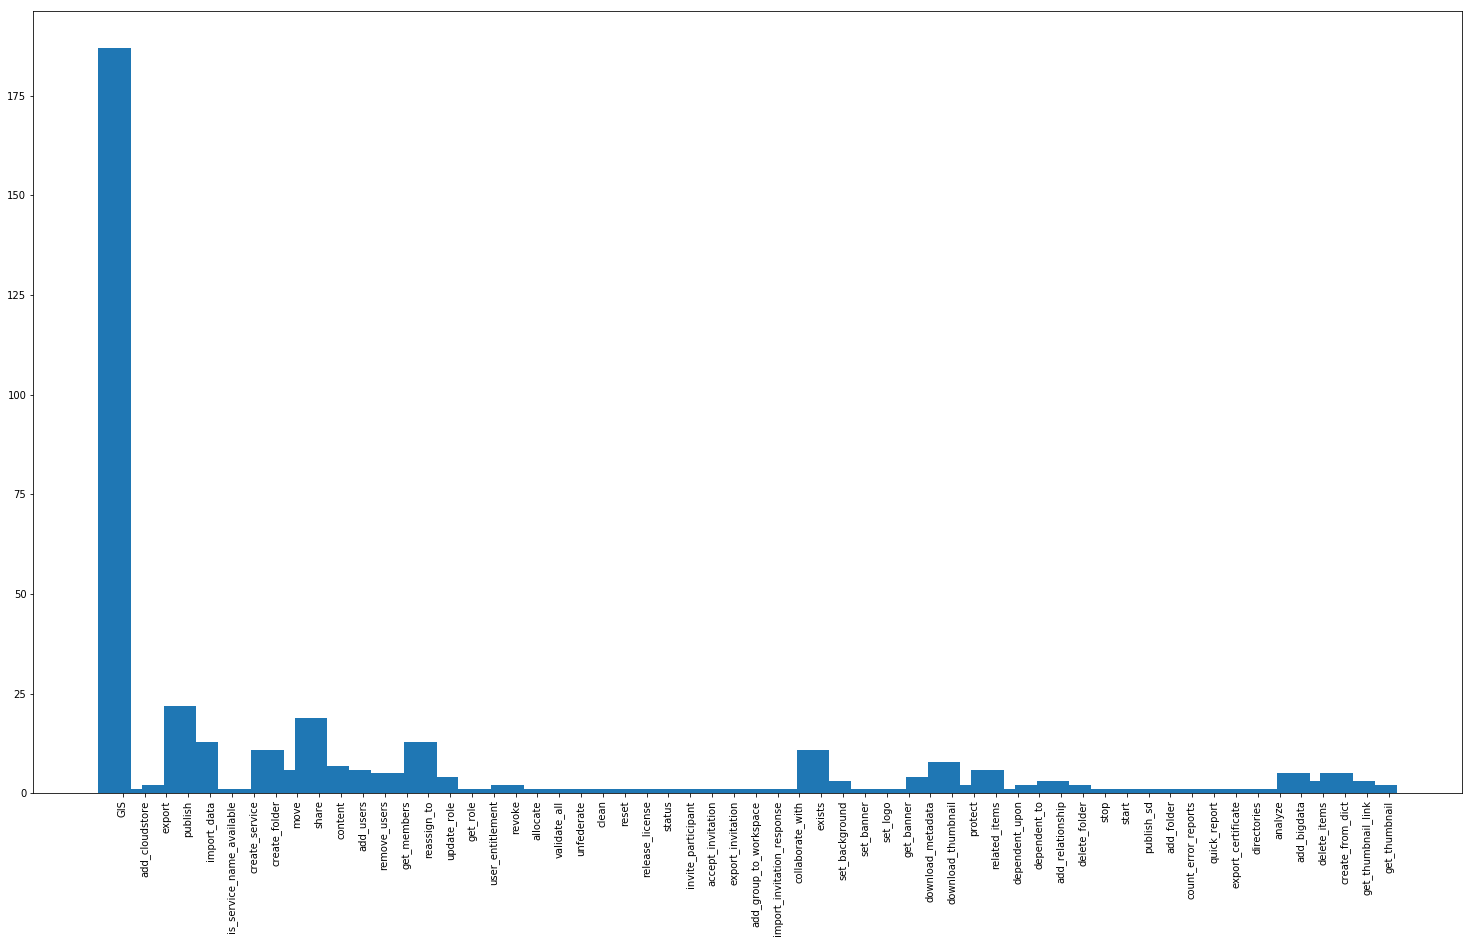

In [35]:
draw_vertical_bar(result3)

Though the two vertical bar plots serves the purpose of visualizing count frequency, the readability of the plots is quite poor. Next, let's use a different way to visualize the result.

#### Display a horizontal bar plot

First, the x-tick and y-tick from previously shown plots are hard to read, we can change the parameters down below:

In [36]:
import matplotlib.pylab as pylab
print(pylab.rcParams['xtick.labelsize'], pylab.rcParams['ytick.labelsize'])

medium medium


In [37]:
params = {
          'figure.figsize': (6.4,12),
          'axes.labelsize': 'small',
          'xtick.labelsize':'small'
         }
pylab.rcParams.update(params)

Then, instead of showing all callee function names, we can only show the top 30 so the bars will not get as crowded.

Also, since we need to show the bars horizontally, use `plt.barh` to replace `plt.bar`:

In [38]:
from collections import OrderedDict

def draw_horizontal_bar(counter):
    # only show the top 50 so the bars will not get as crowded
    y = OrderedDict(counter.most_common(30))
    # Counter data, counter is your counter object
    keys = y.keys()
    y_pos = np.arange(len(keys))
    # get the counts for each key, assuming the values are numerical
    performance = [y[k] for k in keys]
    # not sure if you want this :S
    error = np.random.rand(len(keys))

    plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.2)
    plt.yticks(y_pos, keys)
    plt.xlabel('Usage per function')
    plt.title('Which function is most commonly used?')

    plt.show()

For the function frequency of the `arcgis.raster` module, we can see from the cell below that the most popular function is `filter_by()`.

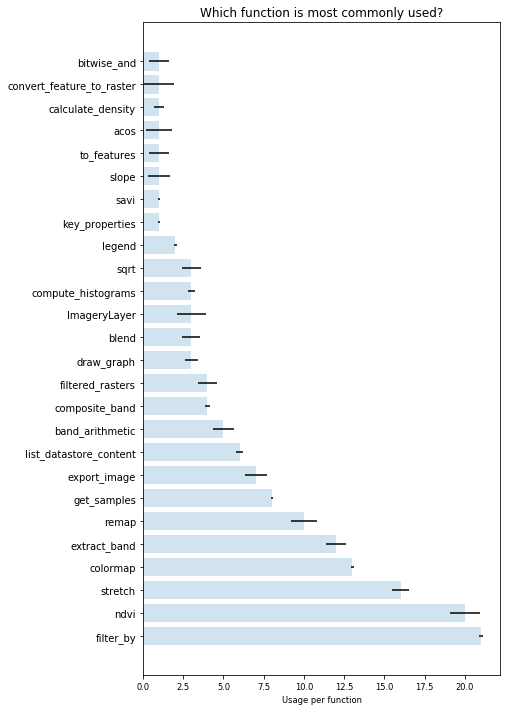

In [39]:
draw_horizontal_bar(result1)

For the function frequency of the `arcgis.features` module, the top 2 most popular functions being called are `head()` and `query()` used to search for records and display the top entries.

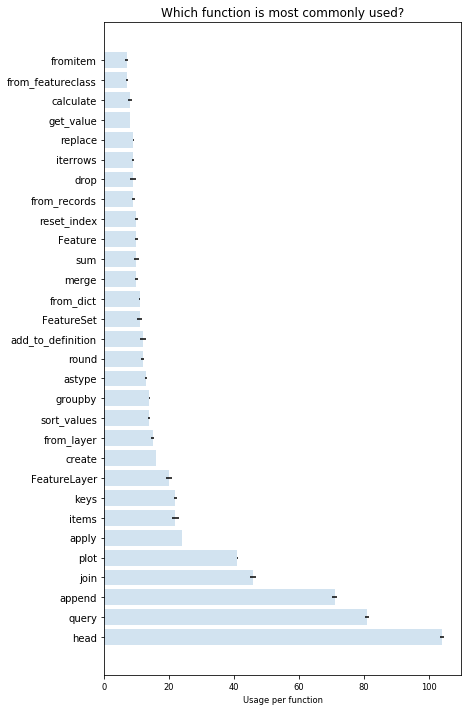

In [40]:
draw_horizontal_bar(result2)

For the function frequency of the `arcgis.gis` module, the top popular function is the initiation of GIS object (a.k.a `GIS()`), and then users also used this module to publish data to organizations, for example, using `publish()`, `share()` and `import_data()`.

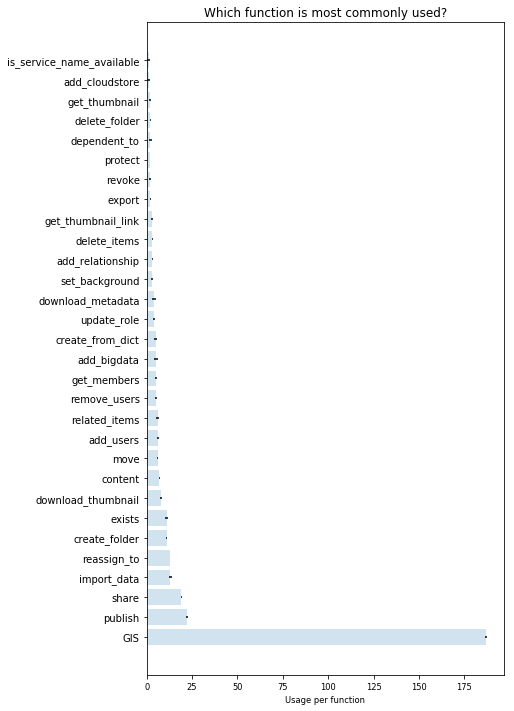

In [41]:
draw_horizontal_bar(result3)

Next, let's look at an overall usage picture. Here, `result` is a returned Counter object that lists the frequency of usage of all built-in functions regardless of module names inside this repo.

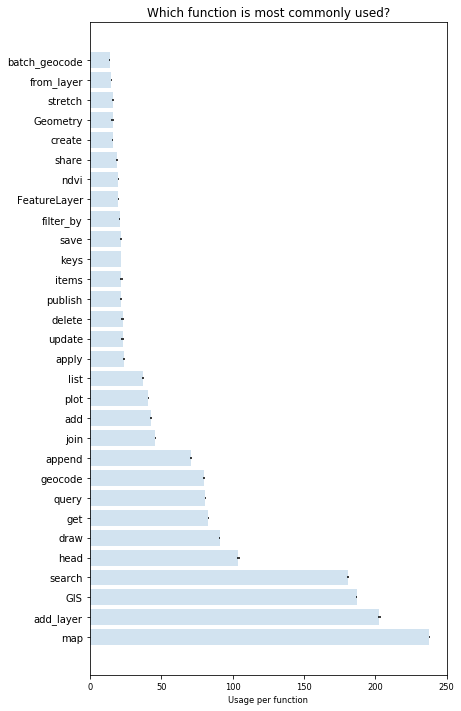

In [43]:
draw_horizontal_bar(result)

From the horizontal bar plots, it is obvious that most of users used the Python API for ArcGIS to establish connection to the GIS object (use case of `GIS()`), search for an existing layer (use case of `search()`), and create a map view (use case of `map()`) by adding an existing layer item (use case of `add_layer()`) inside the GIS object.

## Conclusions

This sample has introduced an approach for product owners or experienced users of an API to count and visualize the usage frequency (or so called popularities) of built-in methods, via these steps: 1. download the remote repo to the local file system, 2. obtain a list of function names which are built-in and exposed publicly by Python API for ArcGIS, 3. convert the IPython Notebooks to Python Source files, 4. count the frequency of function names, and 5. finally create a deliverable visualization of the frequency report.

Also, based on the usage popularity report, helper snippets or function templates can be created to provide users with convenience in reference and access, since it is clear now what the general users to the API are looking for.

Last but not least, from a reverse-engineering perspective, knowing the popularity of function/module usage, product owners can come to a conclusion of what the user groups are , for instance, GIS Professionals, or Data Scientists, etc., from what they are using the API for.